## P 3.1
1. Zaprogramować metodę Eulera (wzór jawny i wsteczny)...
2. a następnie zastosować ją do równania: $y′ =1−2t+4y$
3. Rozwiązać zagadnienie początkowe $y(0) = 1$ w przedziale $t ∈ [0,2]$.
4. Jakim wzorem wyraża się rozwiązanie dokładne?
5. Znaleźć rozwiązanie przybliżone za pomoca obu wariantów metody Eulera?
6. Skomentować wyniki.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### 1. Zaprogramować metodę Eulera

In [2]:
# jawna metoda Eulera
def euler(x, y, step, f):
    return y + step*f(x,y)

# wzór wsteczny Eulera
def back(x, y, step, f):
    pred = euler(x, y, step, f)
    return y + step*f(x+step, pred)

# def heun(h, val_x, val_y, fun):
#     """
#         Heun's method
#         or predictor-corector method
#         or explicit trapezoid method
#     """
#     y0 = euler(h, val_x, val_y, fun)
#     y1 = euler(h, val_x+h, y0, fun)
#     return val_y + h * (y0+y1)/2 

# def midpnt(h, val_x, val_y, fun):
#     """
#         Midpoint Euler's method
#     """
#     y1_2 = euler(h/2, val_x, val_y, dun)
#     return val_y + h * fun(val_x+h/2, y1_2)

### 2. Rozwiązać nią równanie  $y′ =1−2t+4y$, przedział $t ∈ [0,2].$

In [3]:
f = lambda x,y : 1 - 2*x + 4*y
step = 0.02
t = np.arange(0, 2+step, step)
ye = np.zeros(t.shape[0])
yb = np.zeros(t.shape[0])
ye[0] = 1. # zagadnienie początkowe
yb[0] = 1.

yt = lambda x: 1/8*(4*x + 9*np.exp(4*x) + 1)
y = np.zeros(t.shape[0])
y[0] = 1.

for i in range(1,t.shape[0]):
    y[i] = yt(t[i])
    ye[i] = euler(t[i-1], ye[i-1], step, f)
    yb[i] = back(t[i-1], yb[i-1], step, f)
    
print("Przedział t ∈ [",t[0],",",t[-1],"]")

Przedział t ∈ [ 0.0 , 2.0 ]


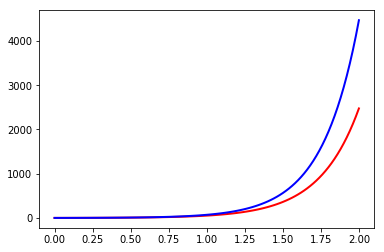

In [4]:
plt.plot(t, ye, 'r-', lw=2)
plt.plot(t, yb, 'b-', lw=2)
plt.show()

### 3. Znaleźć wzór jawny równania dla zagadnienia początkowego


In [5]:
yt = lambda x: 1/8*(4*x + 9*np.exp(4*x) + 1)
y = np.zeros(t.shape[0])
y[0] = 1.

for i in range(1,t.shape[0]):
    y[i] = yt(t[i])

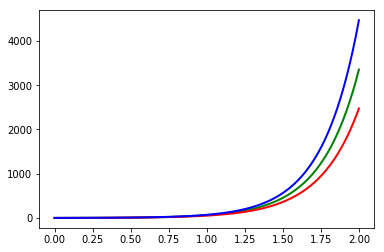

In [6]:
plt.plot(t, y, 'g-', lw=2)
plt.plot(t, ye, 'r-', lw=2)
plt.plot(t, yb, 'b-', lw=2)
plt.show()

### 6. Komentarz

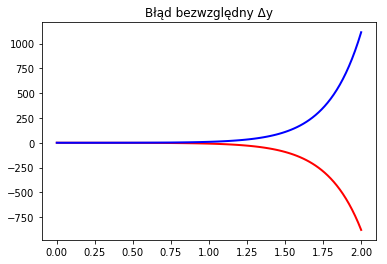

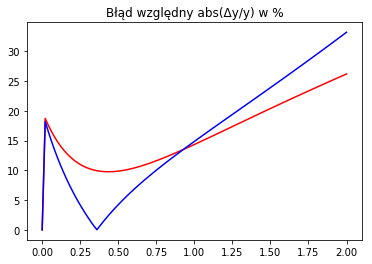

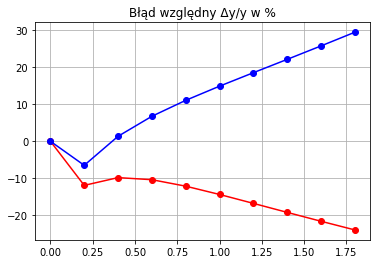

In [9]:
plt.plot(t, ye-y, "r-", lw=2)
plt.plot(t, yb-y, "b-", lw=2)
plt.title("Błąd bezwzględny Δy")
plt.show()

plt.plot(t, np.abs(100*(ye-y)/y), "r-")
plt.plot(t, np.abs(100*(yb-y)/y), "b-")
plt.title("Błąd względny abs(Δy/y) w %")
plt.show()

steps=10
plt.plot(t[0:-1:steps], (100*(ye-y)/y)[0:-1:steps], "ro-")
plt.plot(t[0:-1:steps], (100*(yb-y)/y)[0:-1:steps], "bo-")
plt.title("Błąd względny Δy/y w %")
plt.grid()
plt.show()